In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargar datos

In [2]:
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Normalizar las imágenes

In [3]:
training_images= training_images / 255.0
test_images= test_images / 255.0

#Construcción del modelo

In [6]:
model= keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Flatten(),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

#Compilar modelo

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Entrenar el modelo

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1522 - accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0526 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0328 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0219 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 10/10
1875/1875 [==============================] - 53s 28m

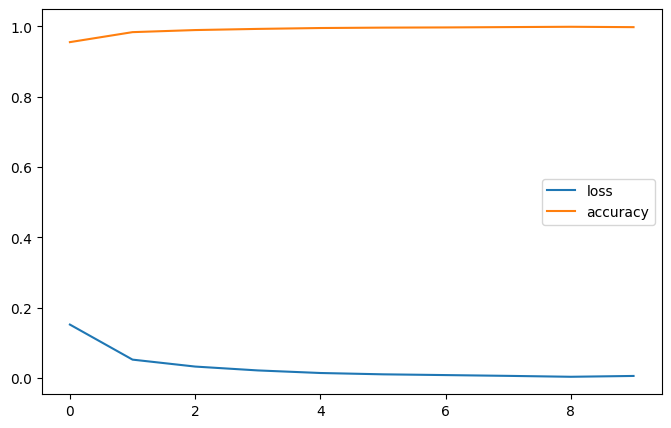

In [9]:
history=model.fit(training_images, training_labels, epochs=10)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Evaluación del modelo


In [10]:
loss, accuracy = model.evaluate(training_images, training_labels)
print('accuracy training: ',accuracy)
print('loss training: ',loss)

loss, accuracy = model.evaluate(test_images, test_labels)
print('accuracy test: ',accuracy)
print('loss test: ',loss)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0045 - accuracy: 0.9985
accuracy training:  0.9984833598136902
loss training:  0.004451496060937643
313/313 [==============================] - 3s 7ms/step - loss: 0.0600 - accuracy: 0.9858
accuracy test:  0.98580002784729
loss test:  0.059958044439554214


# Predicción

Label: 2
1/1 [==============================] - 0s 147ms/step
Classification: [[9.8372357e-15]
 [7.0210530e-12]
 [1.0000000e+00]
 [1.0569647e-14]
 [1.5730796e-19]
 [1.8019533e-22]
 [2.5956931e-15]
 [1.1004905e-16]
 [4.5220562e-18]
 [3.7328678e-15]]


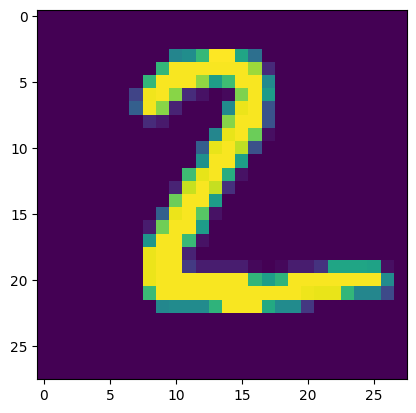

In [11]:
index=1
print(f'Label: {test_labels[index]}')
classification=model.predict(test_images[index:index+1])
print(f'Classification: {classification.reshape(-1,1)}')
plt.imshow(test_images[index])
plt.show()

#Varios

In [12]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [13]:
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: 0
Label: 0
Label: 0


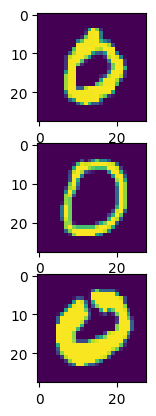

In [14]:
f,axarr=plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [15]:
layer=0
filter1=0
filter2=10

layer_output=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_output)

1/1 [==============================] - 0s 23ms/step


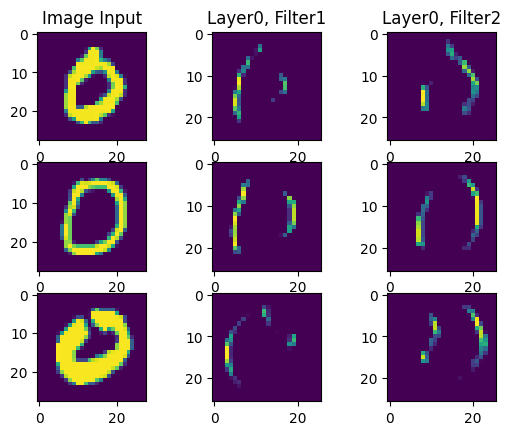

In [19]:
f,axarr=plt.subplots(3,3)
axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title("Layer"+str(layer)+", Filter1")
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title("Layer"+str(layer)+", Filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])


In [20]:
FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14